In [121]:
# Importing relevant libraries
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style as style
from scipy import stats
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1000)
import numpy as np

In [166]:
#Importing the data in excel format
data = pd.read_excel('e_car_data_excel.xls')

In [167]:
data.head()

,Tier,FICO,Approve_Date,Term,Amount,Previous Rate,Car Type,Competition Rate,Rate,Partner,Outcome
0,1,796,2003-10-01,36,5877.00,9.00,R,4.69,7.53,3,0
1,1,707,2004-08-18,36,11035.05,15.75,R,5.05,7.19,3,1
2,1,707,2004-08-18,36,11099.00,17.00,R,5.05,7.19,3,0
3,1,678,2004-08-23,36,11187.19,18.00,R,5.05,7.19,3,1
4,1,682,2004-07-15,36,11642.95,13.95,R,4.95,7.19,3,1


In [168]:
data.shape

(6206, 11)

### Checking null values

In [169]:
data.isna().sum()

Tier                0
FICO                0
Approve_Date        0
Term                0
Amount              0
Previous Rate       0
Car Type            0
Competition Rate    0
Rate                0
Partner             0
Outcome             0
dtype: int64

### Checking dtypes

In [170]:
data.dtypes

Tier                         int64
FICO                         int64
Approve_Date        datetime64[ns]
Term                         int64
Amount                     float64
Previous Rate              float64
Car Type                    object
Competition Rate           float64
Rate                       float64
Partner                      int64
Outcome                      int64
dtype: object

### Getting only numerical variables

In [171]:
data_numeric = data.select_dtypes(include='number')
data_numeric.head()

,Tier,FICO,Term,Amount,Previous Rate,Competition Rate,Rate,Partner,Outcome
0,1,796,36,5877.00,9.00,4.69,7.53,3,0
1,1,707,36,11035.05,15.75,5.05,7.19,3,1
2,1,707,36,11099.00,17.00,5.05,7.19,3,0
3,1,678,36,11187.19,18.00,5.05,7.19,3,1
4,1,682,36,11642.95,13.95,4.95,7.19,3,1


In [172]:
data_numeric.describe()

,Tier,FICO,Term,Amount,Previous Rate,Competition Rate,Rate,Partner,Outcome
count,6206.0,6206.000000,6206.0,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000
mean,1.0,761.689011,36.0,12035.149547,7.932573,4.643484,4.632554,1.963584,0.465678
std,0.0,26.849261,0.0,3656.915750,2.310825,0.264922,0.300569,0.911187,0.498861
min,1.0,627.000000,36.0,4558.750000,3.000000,4.250000,3.450000,1.000000,0.000000
25%,1.0,743.000000,36.0,9147.562500,6.490000,4.390000,4.390000,1.000000,0.000000
50%,1.0,760.500000,36.0,12000.000000,7.490000,4.690000,4.650000,2.000000,0.000000
75%,1.0,781.000000,36.0,14796.742500,8.990000,4.950000,4.750000,3.000000,1.000000
max,1.0,837.000000,36.0,19985.000000,23.990000,5.050000,7.530000,3.000000,1.000000


# Data transformation

In [173]:
data.head()

,Tier,FICO,Approve_Date,Term,Amount,Previous Rate,Car Type,Competition Rate,Rate,Partner,Outcome
0,1,796,2003-10-01,36,5877.00,9.00,R,4.69,7.53,3,0
1,1,707,2004-08-18,36,11035.05,15.75,R,5.05,7.19,3,1
2,1,707,2004-08-18,36,11099.00,17.00,R,5.05,7.19,3,0
3,1,678,2004-08-23,36,11187.19,18.00,R,5.05,7.19,3,1
4,1,682,2004-07-15,36,11642.95,13.95,R,4.95,7.19,3,1


#### Droping columns with no variance (Tier, Term)

In [174]:
data.drop(['Tier','Term','Car Type'],axis=1,inplace=True)

#### Changing the names of the columns for optimal work

In [175]:
data.columns = data.columns.str.replace(' ','_')

#### Creating a new columns called Competitiveness 

(Previous-Offered APR)+(Competitor's-Offered APR) or in simple math Previous + Competitor's rate - 2*Offered APR)

In [176]:
data['Competitiveness'] = data.Previous_Rate + data.Competition_Rate - (2*data.Rate)

#### Creating a new columns with the "Cost_of_funds"

In [177]:
data['Cost_funds'] = 1.84

In [178]:
data.head()

,FICO,Approve_Date,Amount,Previous_Rate,Competition_Rate,Rate,Partner,Outcome,Competitiveness,Cost_funds
0,796,2003-10-01,5877.00,9.00,4.69,7.53,3,0,-1.37,1.84
1,707,2004-08-18,11035.05,15.75,5.05,7.19,3,1,6.42,1.84
2,707,2004-08-18,11099.00,17.00,5.05,7.19,3,0,7.67,1.84
3,678,2004-08-23,11187.19,18.00,5.05,7.19,3,1,8.67,1.84
4,682,2004-07-15,11642.95,13.95,4.95,7.19,3,1,4.52,1.84


#### Changing the order of the columns

In [179]:
data.columns.tolist()

['FICO',
 'Approve_Date',
 'Amount',
 'Previous_Rate',
 'Competition_Rate',
 'Rate',
 'Partner',
 'Outcome',
 'Competitiveness',
 'Cost_funds']

In [180]:
data = data[['FICO',
 'Approve_Date',
 'Amount',
 'Previous_Rate',
 'Competition_Rate',
 'Rate',
 'Partner',
 'Competitiveness',
 'Cost_funds',
 'Outcome']]

### Checking distributions and correlations

In [181]:
data_numeric = data.select_dtypes(include='number')

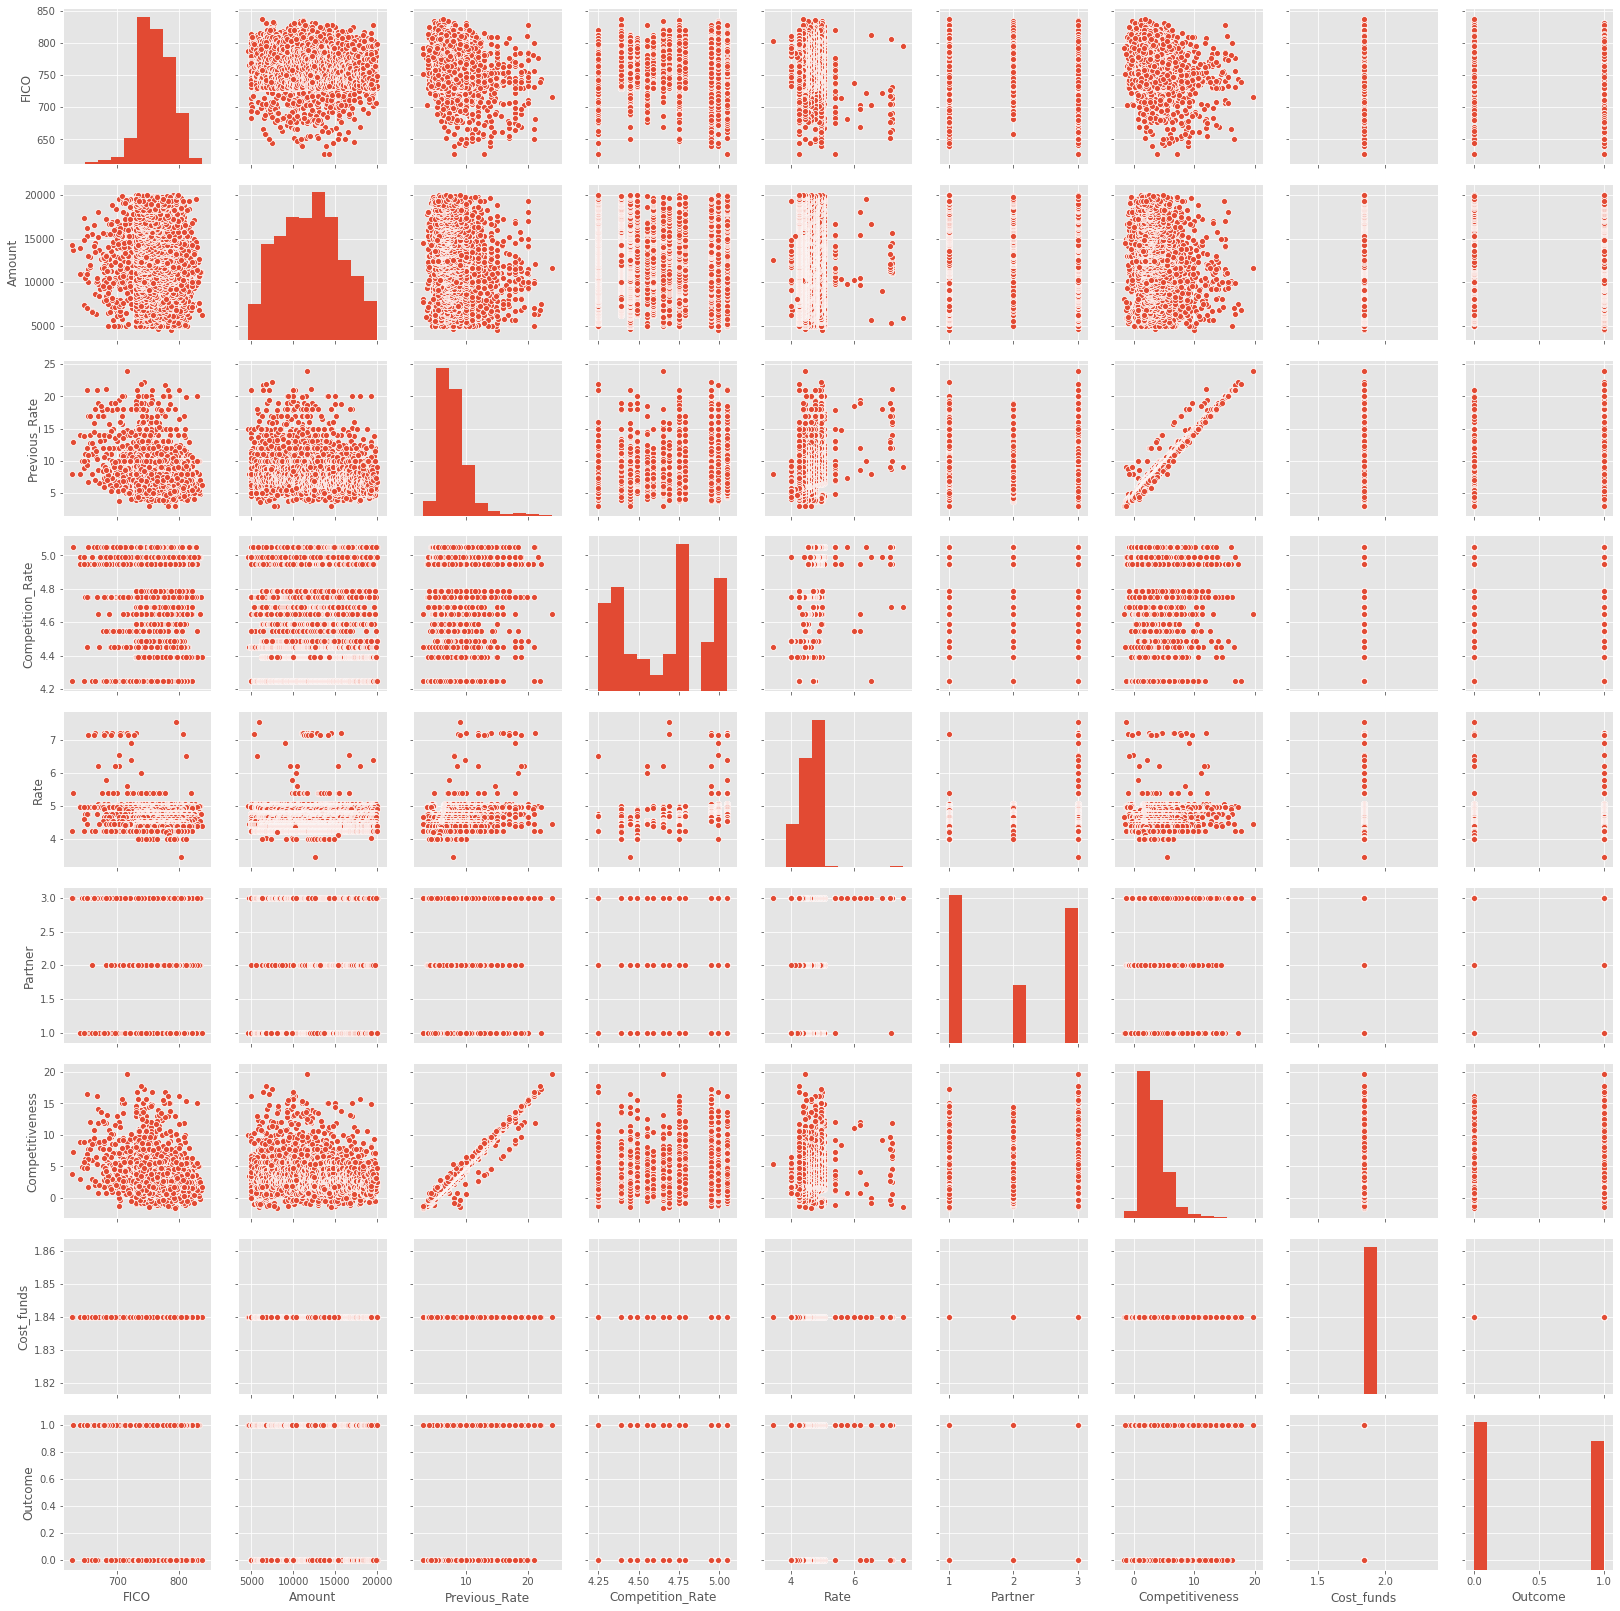

In [143]:
sns.pairplot(data_numeric, height=2.5)

### Checking outliers

In [147]:
data_numeric[(np.abs(stats.zscore(data_numeric)) > 3).all(axis=1)]

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


,FICO,Amount,Previous_Rate,Competition_Rate,Rate,Partner,Competitiveness,Cost_funds,Outcome


### Checking correlations

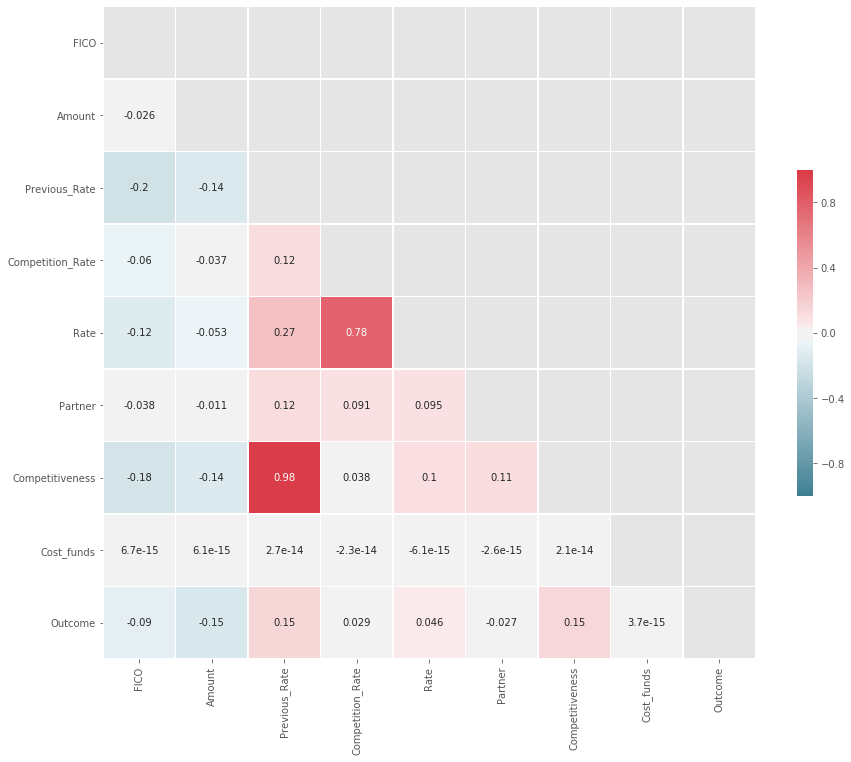

In [182]:
corr=data_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### Droping Previous rate as it is highly correlated with Competitiveness

In [183]:
data_numeric.drop('Previous_Rate',axis=1,inplace=True)

In [188]:
data.drop('Previous_Rate',axis=1,inplace=True)

### Checking multicolinearity

In [204]:
data_numeric.head()

,FICO,Amount,Competition_Rate,Rate,Partner,Competitiveness,Cost_funds,Outcome
0,796,5877.00,4.69,7.53,3,-1.37,1.84,0
1,707,11035.05,5.05,7.19,3,6.42,1.84,1
2,707,11099.00,5.05,7.19,3,7.67,1.84,0
3,678,11187.19,5.05,7.19,3,8.67,1.84,1
4,682,11642.95,4.95,7.19,3,4.52,1.84,1


In [205]:
data_numeric_2 = data_numeric.drop(['Cost_funds','Outcome'],axis=1)

In [206]:
data_numeric_2.head()

,FICO,Amount,Competition_Rate,Rate,Partner,Competitiveness
0,796,5877.00,4.69,7.53,3,-1.37
1,707,11035.05,5.05,7.19,3,6.42
2,707,11099.00,5.05,7.19,3,7.67
3,678,11187.19,5.05,7.19,3,8.67
4,682,11642.95,4.95,7.19,3,4.52


In [207]:
from statsmodels.stats import outliers_influence
from statsmodels.tools.tools import add_constant

X = add_constant(data_numeric_2)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
mc_check

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const               1286.729522
FICO                   1.052421
Amount                 1.024932
Competition_Rate       2.539507
Rate                   2.585756
Partner                1.021293
Competitiveness        1.079041
dtype: float64

#### Checking categorial variables

In [208]:
data.head()

,FICO,Approve_Date,Amount,Competition_Rate,Rate,Partner,Competitiveness,Cost_funds,Outcome
0,796,2003-10-01,5877.00,4.69,7.53,3,-1.37,1.84,0
1,707,2004-08-18,11035.05,5.05,7.19,3,6.42,1.84,1
2,707,2004-08-18,11099.00,5.05,7.19,3,7.67,1.84,0
3,678,2004-08-23,11187.19,5.05,7.19,3,8.67,1.84,1
4,682,2004-07-15,11642.95,4.95,7.19,3,4.52,1.84,1


In [190]:
#Checking Partner variable
data.Partner.value_counts(dropna=False) / data.shape[0]

1    0.433935
3    0.397519
2    0.168547
Name: Partner, dtype: float64

In [191]:
#Checking Outcome distributions
data.Outcome.value_counts() / data.shape[0]

0    0.534322
1    0.465678
Name: Outcome, dtype: float64

#### Comments:

- Partners which indicates the channel in whish a client arrives to the company have two main groups, 1 and 3 and a smaller group 2. 

- But most importantly, as we are working with Supervised Machine Learning, it is important that the target variable is balanced which in this case it is. 

### Checking again the summary statistics of the data

In [192]:
data.describe()

,FICO,Amount,Competition_Rate,Rate,Partner,Competitiveness,Cost_funds,Outcome
count,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.00,6206.000000
mean,761.689011,12035.149547,4.643484,4.632554,1.963584,3.310949,1.84,0.465678
std,26.849261,3656.915750,0.264922,0.300569,0.911187,2.218533,0.00,0.498861
min,627.000000,4558.750000,4.250000,3.450000,1.000000,-1.650000,1.84,0.000000
25%,743.000000,9147.562500,4.390000,4.390000,1.000000,1.800000,1.84,0.000000
50%,760.500000,12000.000000,4.690000,4.650000,2.000000,2.800000,1.84,0.000000
75%,781.000000,14796.742500,4.950000,4.750000,3.000000,4.240000,1.84,1.000000
max,837.000000,19985.000000,5.050000,7.530000,3.000000,19.740000,1.84,1.000000


In [193]:
data_numeric_final = data.select_dtypes(include='number')

In [195]:
style.use('ggplot')

In [196]:
data.columns.tolist()

['FICO',
 'Approve_Date',
 'Amount',
 'Competition_Rate',
 'Rate',
 'Partner',
 'Competitiveness',
 'Cost_funds',
 'Outcome']

IndexError: list index out of range

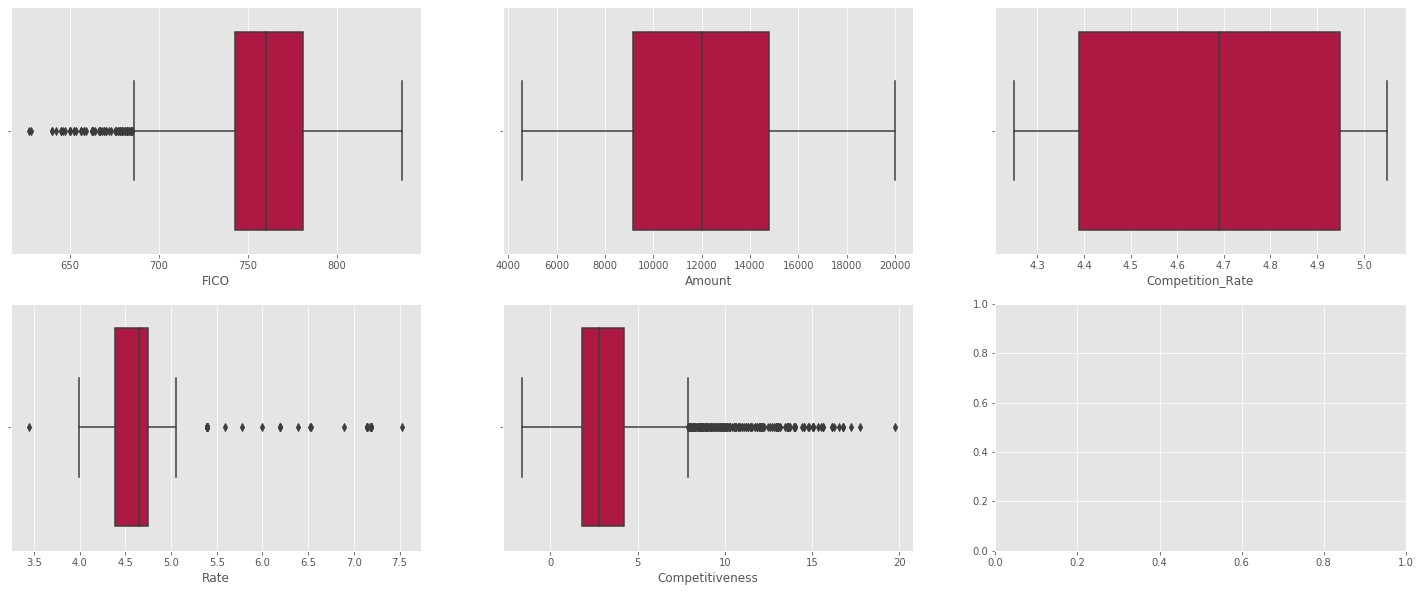

In [198]:
fig, [ax1,ax2] = plt.subplots(2,3,figsize=(25,10))

lista = ['FICO', 'Amount', 'Competition_Rate',
       'Rate', 'Competitiveness']

for i in range(3):
    sns.boxplot(data[lista[0+i]], ax=ax1[i], color='#C70039')
    sns.boxplot(data[lista[3+i]],ax=ax2[i],color='#C70039')

## Convert Partner to a dummy variable

In [226]:
data_dummies = pd.get_dummies(data, columns = ['Partner'], drop_first=True)

In [227]:
data_dummies.head()

,FICO,Approve_Date,Amount,Competition_Rate,Rate,Competitiveness,Cost_funds,Outcome,Partner_2,Partner_3
0,796,2003-10-01,5877.00,4.69,7.53,-1.37,1.84,0,0,1
1,707,2004-08-18,11035.05,5.05,7.19,6.42,1.84,1,0,1
2,707,2004-08-18,11099.00,5.05,7.19,7.67,1.84,0,0,1
3,678,2004-08-23,11187.19,5.05,7.19,8.67,1.84,1,0,1
4,682,2004-07-15,11642.95,4.95,7.19,4.52,1.84,1,0,1


In [229]:
data.Approve_Date.min()

Timestamp('2003-06-02 00:00:00')

In [230]:
data.Approve_Date.max()

Timestamp('2004-11-16 00:00:00')

In [233]:
data_dummies.columns.tolist()

['FICO',
 'Approve_Date',
 'Amount',
 'Competition_Rate',
 'Rate',
 'Competitiveness',
 'Cost_funds',
 'Outcome',
 'Partner_2',
 'Partner_3']

In [235]:
data = data_dummies[['FICO',
 'Approve_Date',
 'Amount',
 'Competition_Rate',
 'Rate',
 'Competitiveness',
 'Cost_funds',
 'Partner_2',
 'Partner_3',
 'Outcome']]

In [236]:
data.to_csv('data_clean.csv')